**В проектной работе предстоит изучить ранок российского кинопроката и выявить текущие тренды. Проанализировать данные опубликованные на  портале Минестерства культуры.**

**План действий:**
1. Ознакомимся с данными и приведем их в удобный для анализа вид.
2. Проведем общий анализ данных, иследуем какие фильмы выходили в прокат, что влияет на заинтересованность российской аудитории.
3. Изучим фильмы получившие государственную поддержку. Проанализируем от чего зависят сбры этих фильмов, какие фильмы с государственной поддержкой заинтересовали зрителя, а какие нет..

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)
pd.options.display.float_format = '{:.2f}'.format

**Используемые функции**

In [2]:
def to_int (dt, columns):
    '''Преобразовать тип в столбеце'''
    for column in columns:
        dt[column] = dt[column].round().astype(int, errors='ignore')
    return dt

def to_strip (dt, columns):
    '''Убать лишние пробелы'''
    for column in columns:
        dt[column] = dt[column].str.strip()
    return dt

## Исследование данных о российском кинопрокате



### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

**Открываем файлы**

In [3]:
mkrf_movies = pd.read_csv('/datasets/mkrf_movies.csv')
mkrf_shows = pd.read_csv('/datasets/mkrf_shows.csv')

**Изучим данные**

In [4]:
mkrf_movies.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,nan,nan,nan,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,nan,nan,nan,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.8,"фантастика,боевик,триллер"


In [5]:
mkrf_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
title                    7486 non-null object
puNumber                 7486 non-null object
show_start_date          7486 non-null object
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
dtypes: float64(3), object(12)
memory usage: 877.4+ KB


In [6]:
mkrf_movies.columns

Index(['title', 'puNumber', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres'],
      dtype='object')

**Проверим совпадают ли заполненные значения в refundable_support, nonrefundable_support, budget, financing_source.**

In [7]:
mkrf_movies[mkrf_movies['refundable_support'].notna() & mkrf_movies['nonrefundable_support'].notna()\
               & mkrf_movies['budget'].notna() & mkrf_movies['financing_source'].notna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1281,Пока еще жива,111005313,2013-10-11T12:00:00.000Z,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.00,26500000.00,79411900.00,Министерство культуры,8.1,"драма,мелодрама"
1448,Бесславные придурки,111003314,2014-03-28T12:00:00.000Z,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.00,26000000.00,37142857.00,Министерство культуры,NaN,NaN
1498,Невидимки,111004213,2013-09-10T12:00:00.000Z,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.00,107847945.00,176023490.00,Фонд кино,5.3,"комедия,фантастика"
1524,БЕРЦЫ,111004314,2014-05-05T12:00:00.000Z,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.00,28000000.00,40574140.00,Министерство культуры,4.2,драма
1792,Братья Ч,111004414,2014-04-23T12:00:00.000Z,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.00,25000000.00,40015122.00,Министерство культуры,6.4,драма
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,Союз спасения,111022019,2019-12-26T12:00:00.000Z,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100000000.00,400000000.00,980000000.00,Фонд кино,6.0,"история,биография,драма"
7466,Иван Царевич и Серый Волк 4,114005019,2019-12-20T12:00:00.000Z,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,100000000.00,0.00,190000000.00,Фонд кино,6.7,"мультфильм,приключения,семейный"
7474,Вторжение,111022519,2019-12-23T12:00:00.000Z,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000.00,400000000.00,944000000.00,Фонд кино,5.7,"фантастика,боевик"
7476,Я свободен,111023019,2019-12-26T12:00:00.000Z,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.00,30000000.00,46154000.00,Министерство культуры,5.9,драма


**В данных mkrf_movies:**
1. puNumber необходимо приветси в змеиный регистер и изменить тип данных
2. show_start_date представленно с timezone, перевести в формат datetime64 и сменить время на Московское
3. ratings перевести во float
4. Данные в refundable_support,nonrefundable_support, budget, financing_source заполненны совместно.
5. refundable_support,nonrefundable_support, budget перевести в int
3. Есть пропуски в film_studio, production_country, director, producer, ratings, genres. В даннх могут повторятся названия фильмов, можно по ним попробовать заменить пропуски в данных.



In [8]:
mkrf_shows.head()

,puNumber,box_office
0,111000113,2450.00
1,111000115,61040.00
2,111000116,153030013.40
3,111000117,12260956.00
4,111000118,163684057.79


In [9]:
mkrf_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
puNumber      3158 non-null int64
box_office    3158 non-null float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


**В данных mkrf_shows:**
1. puNumber необходимо приветси в змеиный регистер
2. box_office перевести значения в int


**Объединять файлы будем по данным в puNumber, но для объединения нам необходимо превисти их к числовому типу. Пменяем тип puNumber в mkrf_movies и сразу запишем его в новую колонку pu_number. Ошибку при замене будем заменять на пропуск, затем проверим в каких строках произошла ошибка перевода в числовой формат**

In [10]:
mkrf_movies['pu_number'] = pd.to_numeric(mkrf_movies['puNumber'], errors='coerce')
mkrf_movies[mkrf_movies['pu_number'].isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,pu_number
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,nan,nan,nan,NaN,NaN,NaN,nan


**В одной строке отсуствует номер прокатного удостоверения. Можем удалить старый столбец puNumber, оставить новый pu_number.**

In [11]:
mkrf_movies = mkrf_movies.drop('puNumber',1)
mkrf_movies['pu_number'] = mkrf_movies['pu_number'].fillna(0)
mkrf_movies.head(1)

,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,pu_number
0,Открытый простор,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,nan,nan,nan,NaN,7.2,"боевик,драма,мелодрама",221048915.00


**Заменяю название колонки в mkrf_shows и объединяю два датафрейма**

In [12]:
mkrf_shows = mkrf_shows.rename(columns={'puNumber' : 'pu_number'})
data = mkrf_movies.merge(mkrf_shows, on='pu_number', how='left')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
title                    7486 non-null object
show_start_date          7486 non-null object
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
pu_number                7486 non-null float64
box_office               3158 non-null float64
dtypes: float64(5), object(11)
memory usage: 994.2+ KB


,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,pu_number,box_office
0,Открытый простор,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,nan,nan,nan,NaN,7.2,"боевик,драма,мелодрама",221048915.00,nan
1,Особо важное задание,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,nan,nan,nan,NaN,6.6,"драма,военный",111013716.00,nan
2,Особо опасен,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.8,"фантастика,боевик,триллер",221038416.00,nan
3,Особо опасен,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.8,"фантастика,боевик,триллер",221026916.00,nan
4,Особо опасен,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.8,"фантастика,боевик,триллер",221030815.00,nan


In [13]:
len(data[data['box_office'].notna()]['pu_number'].unique())

3158

In [14]:
data.shape

(7486, 16)

#### Вывод
1. В итоговоый датафрейм вошли все данные из mkrf_shows и mkrf_movies
1. Создал новый столбец pu_number, столбец puNumber не заменял, для проверки данных которые выдали ошибку при переводе в числовой тип, с ошибкой остался одна строка со значением "нет" в puNumber.
2. show_start_date представленно с timezone, перевести в формат datetime64 и сменить время на Московское
3. Столбец ratings перевести во float 
4. Данные в refundable_support,nonrefundable_support, budget, financing_source заполненны совместно.
3. Есть пропуски в film_studio, production_country, director, producer, ratings, genres. В даннх могут повторятся названия фильмов, можно по ним попробовать заменить пропуски.


### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

**После знакомства с данными и объединения двух датафремов следующие данные требуют замены типа:**
1. show_start_date перевести в datetime64
2. refundable_support,nonrefundable_support, budget, pu_number перевести в int
3. Столбец ratings перевести во float


In [15]:
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%dT%H:%M:%S')
data['show_start_date'] = pd.to_datetime(data['show_start_date']).dt.tz_convert('Europe/Moscow')
data['show_start_date'] = pd.to_datetime(data['show_start_date']).dt.tz_localize(None)

In [16]:
columns_1 = ['refundable_support', 'nonrefundable_support', 'budget', 'box_office', 'pu_number']
data = data.pipe(to_int, columns_1)
data['ratings'] = pd.to_numeric(data['ratings'], errors='coerce')
data.info()
data[data['refundable_support'].notna()].head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
title                    7486 non-null object
show_start_date          7486 non-null datetime64[ns]
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6490 non-null float64
genres                   6510 non-null object
pu_number                7486 non-null int64
box_office               3158 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1), object(9)
memory usage: 994.2+ KB


,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,pu_number,box_office
1281,Пока еще жива,2013-10-11 16:00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.00,26500000.00,79411900.00,Министерство культуры,8.10,"драма,мелодрама",111005313,365354.00
1448,Бесславные придурки,2014-03-28 16:00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.00,26000000.00,37142857.00,Министерство культуры,nan,NaN,111003314,28140.00
1498,Невидимки,2013-09-10 16:00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.00,107847945.00,176023490.00,Фонд кино,5.30,"комедия,фантастика",111004213,19957032.00
1524,БЕРЦЫ,2014-05-05 16:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.00,28000000.00,40574140.00,Министерство культуры,4.20,драма,111004314,55918.00
1792,Братья Ч,2014-04-23 16:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.00,25000000.00,40015122.00,Министерство культуры,6.40,драма,111004414,232100.00


##### Вывод
1. show_start_date переведен в datetime64, поставлен московский часовой пояс. 
2. refundable_support, nonrefundable_support, budget, box_office перевести в int не получилось, в связи с наличием пропусков.
3. Столбец ratings переведен во float


#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

**В данных имеются пропуски в следующих столбцах:**
1. film_studoi -  возможно связано с отсутсвием данных на кинопоиске
2. production_country - возможно связано с отсутсвием данных на кинопоиске
3. director - возможно связано с отсутсвием данных на кинопоиске
4. producer - возможно связано с отсутсвием данных на кинопоиске
5. refundable_support, nonrefundable_support, budget,financing_source - пропуски связаны с отсутсвием государственной поддержки
6. ratings - возможно связано с отсутсвием данных на кинопоиске
7. genres - возможно связано с отсутсвием данных на кинопоиске 
8. box_office - возможно данные фильмы не выходили в прокат в российских кинотетрах


In [17]:
data.isna().sum()

title                       0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   996
genres                    976
pu_number                   0
box_office               4328
dtype: int64

In [18]:
data[data['film_studio'].isna()]

,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,pu_number,box_office
1293,Stars in Shorts,2014-06-03 16:00:00,Художественный,NaN,"США, Великобритания","Роберт Фестингер, Руперт Френд, Джей Камен, Ни...","Татьяна Келли, Роберта Мунро, Руперт Френд, До...",«16+» - для детей старше 16 лет,nan,nan,nan,NaN,7.30,комедия,121011114,nan
4441,Мульт личности. Выпуск 5,2010-01-25 15:00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,nan,nan,nan,NaN,4.00,"мультфильм,комедия",214000410,nan
6105,Значит любит,2018-08-10 15:00:00,Художественный,NaN,Россия,А.Краевский,Е.Щербакова,«18+» - запрещено для детей,nan,nan,nan,NaN,nan,NaN,111013818,nan
6181,Несейка. Младшая дочь,2018-09-01 15:00:00,Документальный,NaN,Россия,В.Марин,"Д.Якунин, Ф.Абрютин, О.Филонова",«6+» - для детей старше 6 лет,nan,nan,nan,NaN,nan,NaN,112007018,nan
6379,Ян Антонышев,2018-11-15 15:00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,nan,nan,nan,NaN,nan,NaN,112011818,nan
6380,Ян Антонышев,2018-11-15 15:00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,nan,nan,nan,NaN,nan,NaN,112011918,nan
6399,Доживем до каникул?..,2018-11-15 15:00:00,Художественный,NaN,Россия,Я.Хальпукова (псевдоним Яна Мартынец),Я.Хальпукова (псевдоним Яна Мартынец),«12+» - для детей старше 12 лет,nan,nan,nan,NaN,nan,NaN,111021918,41225.00
6485,До и После,2018-12-05 15:00:00,Документальный,NaN,Россия,А.Новокреповская,А.Новокреповская,«6+» - для детей старше 6 лет,nan,nan,nan,NaN,6.90,"драма,криминал,детектив",112014418,nan
6494,Калмыцкий геше Нгаванг Вангьял,2018-12-05 15:00:00,Научно-популярный,NaN,Россия,И.Долгина,И.Долгина,«12+» - для детей старше 12 лет,nan,nan,nan,NaN,nan,NaN,113002018,nan
6497,Мой папа Чингисхан,2018-12-06 15:00:00,Документальный,NaN,Россия,А.Сайфуллина,А.Сайфуллина,«12+» - для детей старше 12 лет,nan,nan,nan,NaN,nan,NaN,112014918,nan


In [19]:
data[data['production_country'].isna()]

,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,pu_number,box_office
3186,"Детский юмористический киножурнал ""Ералаш. Ну ...",2016-02-09 15:00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,nan,nan,nan,NaN,7.20,"детский,комедия",111001216,194527.00
4441,Мульт личности. Выпуск 5,2010-01-25 15:00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,nan,nan,nan,NaN,4.00,"мультфильм,комедия",214000410,nan


**Пропуски в production_country можно заменить на значение Россия**

In [20]:
data['production_country'] = data['production_country'].fillna('Россия')
data[data['production_country'].isna()]

,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,pu_number,box_office


In [21]:
data[data['director'].isna()]

,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,pu_number,box_office
764,"Три звезды. Концерт в Waldbuhne Theater, Берли...",2012-12-04 16:00:00,Прочие,Райзинг Алтернатив,Великобритания,NaN,Вальдбюне Театр,«0+» - для любой зрительской аудитории,nan,nan,nan,NaN,nan,NaN,126003512,44350.00
1735,Помпеи. Британский музей,2013-09-11 16:00:00,Прочие,"МортуСкрин, Британский музей",Великобритания,NaN,Британский музей,«0+» - для любой зрительской аудитории,nan,nan,nan,NaN,nan,NaN,126003413,nan
3840,Зур концерт (Большой концерт).,2010-06-24 16:00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,nan,nan,nan,NaN,nan,NaN,217027010,nan
4052,"Ганс Сэйфуллин ""Авылым чишмэлэре. Ганс Сэйфулл...",2010-04-22 16:00:00,Художественный,"ООО ""Барс-Рекордс""",Россия,NaN,NaN,«0+» - для любой зрительской аудитории,nan,nan,nan,NaN,nan,NaN,217017310,nan
4298,Изге Вэли (Святой Валентин),2010-05-20 16:00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,nan,nan,nan,NaN,nan,NaN,217020610,nan
4415,Bon Jovi. The Circle Tour,2010-11-11 15:00:00,Прочие,Эншутц Интертейнмент Груп,США,NaN,Эншутц Интертейнмент Груп,«0+» - для любой зрительской аудитории,nan,nan,nan,NaN,7.90,"концерт,музыка",126001710,nan
4441,Мульт личности. Выпуск 5,2010-01-25 15:00:00,Художественный,NaN,Россия,NaN,NaN,«0+» - для любой зрительской аудитории,nan,nan,nan,NaN,4.00,"мультфильм,комедия",214000410,nan
4923,Георг Фридрих Гендель. Мессия. Оратория. Корол...,2011-04-25 16:00:00,Прочие,Опус Арт,Великобритания,NaN,Короевский колледж Кембриджа,«0+» - для любой зрительской аудитории,nan,nan,nan,NaN,nan,NaN,126001111,nan
4942,Питер Гэбриэл и New Blood Orchestra 3D,2011-11-11 16:00:00,Прочие,Омниверс Визион,Великобритания,NaN,Омниверс Визион,«0+» - для любой зрительской аудитории,nan,nan,nan,NaN,6.70,"концерт,музыка",126002711,nan


In [22]:
data[data['producer'].isna()]

,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,pu_number,box_office
1,Особо важное задание,2016-09-13 15:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,nan,nan,nan,NaN,6.60,"драма,военный",111013716,nan
5,Остановился поезд,2016-09-13 15:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,nan,nan,nan,NaN,7.70,драма,111013816,nan
6,Любовь и голуби,2013-10-18 16:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,nan,nan,nan,NaN,8.30,"мелодрама,комедия",111007013,2700.00
9,Отпуск за свой счет,2014-12-01 15:00:00,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,nan,nan,nan,NaN,7.80,"мелодрама,комедия",111019114,nan
11,Ответный ход,2014-12-01 15:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,М.Туманишвили,NaN,«12+» - для детей старше 12 лет,nan,nan,nan,NaN,7.80,"боевик,драма,приключения",111019014,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7405,Отряд специального назначения,2019-12-01 15:00:00,Художественный,Свердловская киностудия,СССР,Г.Кузнецов,NaN,«6+» - для детей старше 6 лет,nan,nan,nan,NaN,7.00,"приключения,военный",111020419,nan
7406,Назначаешься внучкой,2019-12-01 15:00:00,Художественный,Свердловская киностудия,СССР,Я.Лапшин,NaN,«12+» - для детей старше 12 лет,nan,nan,nan,NaN,7.00,военный,111020519,nan
7407,Перед рассветом,2019-12-01 15:00:00,Художественный,Свердловская киностудия,СССР,Я.Лапшин,NaN,«16+» - для детей старше 16 лет,nan,nan,nan,NaN,7.90,"драма,мелодрама",111020619,nan
7408,Ты помнишь,2019-12-01 15:00:00,Художественный,Свердловская киностудия,СССР,О.Николаевский,NaN,«12+» - для детей старше 12 лет,nan,nan,nan,NaN,7.00,"драма,мелодрама,военный",111020719,nan


In [23]:
data['financing_source'].unique()

array([nan, 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

**Заменим пропуски в financing_source на значение "нет"**

In [24]:
data['financing_source'] = data['financing_source'].fillna('нет')

In [25]:
data[data['ratings'].isna()]

,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,pu_number,box_office
43,Мемуары гейши (по роману Артура Голдена),2012-12-14 16:00:00,Художественный,"Коламбия Пикчерз Корпорейшн, ДримУоркс ЭсКейДж...",США,Роб Маршалл,"Стивен Спилберг, Люси Фишер, Дуглас Уик, Джон ...",«12+» - для детей старше 12 лет,nan,nan,nan,нет,nan,NaN,121000606,nan
150,Жди меня,2015-08-25 15:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"А.Столпер, Б.Иванов",NaN,«6+» - для детей старше 6 лет,nan,nan,nan,нет,nan,NaN,111013615,nan
154,Дом из песка и тумана (по книге Андре Дюбуи III),2013-10-25 16:00:00,Художественный,Кобальт Пикчерз,США,Вадим Перельман,Майкл Лондон,«16+» - для детей старше 16 лет,nan,nan,nan,нет,nan,NaN,221037813,nan
159,Жемчужная девушка,2014-08-28 16:00:00,Художественный,"Чешское телевидение,Студия ""Три брата"" агентск...",Чехия,Владимир Дрга,NaN,«0+» - для любой зрительской аудитории,nan,nan,nan,нет,nan,NaN,224011014,nan
227,Полустанок,2014-12-24 15:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Б.Барнет,NaN,«12+» - для детей старше 12 лет,nan,nan,nan,нет,nan,NaN,111026714,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7479,Эколав,2019-12-26 15:00:00,Художественный,ВГИК,Россия,Д.Григорьев,ВГИК,«18+» - запрещено для детей,nan,nan,nan,нет,nan,NaN,111023219,nan
7480,Акрам Хан: Родом из Карри Хауса,2019-12-23 15:00:00,Прочие,Свон Филмз,Великобритания,Ник Пойнц,"Поппи Бегум, Ник Пойнц",«12+» - для детей старше 12 лет,nan,nan,nan,нет,nan,NaN,126007919,219569.00
7481,Сад художника: Американский импрессионизм,2019-12-23 15:00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,nan,nan,nan,нет,nan,NaN,126008019,nan
7483,Щенячий патруль: Скорей спешим на помощь!,2019-12-28 15:00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,nan,nan,nan,нет,nan,NaN,124010819,nan


**Можно заменить пропуски в box_office на 0, это будет означать что фильм не выходил в прокат в Российских кинотеатрах. Для начала необходимо проверить есть ли уже данные со значением 0**

In [26]:
data[data['box_office'].abs() == 0]

,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,pu_number,box_office
66,Анна Павлова,2013-12-19 16:00:00,Художественный,"совместное производство Киностудия ""Мосфильм"",...","СССР, Франция, Англия, Куба, ГДР",Эмиль Лотяну,NaN,«6+» - для детей старше 6 лет,nan,nan,nan,нет,7.70,"драма,биография,музыка",111011013,0.00
237,Подранки,2013-10-18 16:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Н.Губенко,NaN,«12+» - для детей старше 12 лет,nan,nan,nan,нет,8.20,драма,111007613,0.00
596,Запах вереска,2012-05-23 16:00:00,Художественный,"ООО ""Студия РИМ""",Россия,А.Магомедов,"М.Балашова, Е.Миронов",«16+» - для детей старше 16 лет,nan,nan,nan,нет,6.30,комедия,111003012,0.00
914,В тумане /По одноименной повести Василя Быкова/,2012-11-07 16:00:00,Художественный,"Ма Йа Де Фикшн, Лемминг Филм, Беларусьфильм, Д...",Германия - Нидерланды - Беларусь - Россия - Ла...,Сергей Лозница,Хайно Декерт,«12+» - для детей старше 12 лет,nan,nan,nan,нет,6.50,"драма,военный,история",121027712,0.00
932,Письмо для Момо,2012-10-25 16:00:00,Анимационный,"Кадокава Пикчерз, Продакшнз И Джи, Токио Броад...",Япония,Окиура Хироюки,"Хироюки Икеда, Митсухиса Ишикава, Кацзуя Хамана",«12+» - для детей старше 12 лет,nan,nan,nan,нет,7.40,"аниме,мультфильм,драма",124002912,0.00
933,Летние войны,2012-10-25 16:00:00,Анимационный,"Медхауз, Ниппон Телевижн Нетуорк Корпорейшн, К...",Япония,Мамору Хосода,"Такафуми Ватанабэ, Такуя Ито, Сэйдзи Окуда, Юи...",«12+» - для детей старше 12 лет,nan,nan,nan,нет,7.70,"аниме,мультфильм,фантастика",124002812,0.00
976,Гарегин Нжде,2013-04-23 16:00:00,Художественный,"Эй Джи Кей Продакшнз, Пан Армениан Медиа Групп",Армения,Грач Кешишян,Грач Кешишян,«12+» - для детей старше 12 лет,nan,nan,nan,нет,7.90,биография,131000213,0.00
1126,Марафон,2012-12-18 16:00:00,Художественный,"ООО ""Синема Арт Студио""",Россия,К.Оганесян,К.Оганесян,«16+» - для детей старше 16 лет,nan,nan,nan,нет,5.50,"комедия,мелодрама",111006712,0.00
1387,Экзамен для двоих /По роману Джин Ханфф Корелитц/,2013-06-11 16:00:00,Художественный,Депф оф Филд,США,Пол Вайц,"Пол Вайц, Керри Кохански, Эндрю Миано",«12+» - для детей старше 12 лет,nan,nan,nan,нет,5.80,"мелодрама,комедия,драма",121014613,0.00
1559,Последняя любовь мистера Моргана /По роману Фр...,2014-02-11 16:00:00,Художественный,"Камински Штим Фильм, Бавариа Пикчерз, Сенатор ...",Германия - Бельгия - США -Франция,Сандра Неттельбек,"Франк Камински, Астрид Камке, Филипп Кройцер, ...",«16+» - для детей старше 16 лет,nan,nan,nan,нет,6.90,драма,121002614,0.00


In [27]:
data.isna().sum()

title                       0
show_start_date             0
type                        0
film_studio                18
production_country          0
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source            0
ratings                   996
genres                    976
pu_number                   0
box_office               4328
dtype: int64

##### Вывод
1. Оставлены пропуски в film_studoi, director, producer, ratings, genres. Связаны с отсутсвием данных на кинопоиске или некорректным сбором данных. 
2. Заменены пропуски в production_country
3. Заменены пропуски в financing_source на занчение "нет".
4. Пропуски в refundable_support, nonrefundable_support, budget оставлены пропущенными.
3. Пропуски в box_office оставил пропущенными, для дальнейшего разделения вышедших в прокат фильмов.

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

**Дубликаты могут быть в колонках:**
1. pu_number
2. title - известно что это нормально
**Неявные дубликаты могут быть в колонках:**
1. type
2. film_studio
2. production_country
3. director
5. age_restriction
6. genres

**Проверим наличие явных дубликатов**

In [28]:
data.duplicated().sum()

0

**Проверим дубликаты по прокатным удостоверениям**

In [29]:
data[data['pu_number'].duplicated()]

,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,pu_number,box_office
4639,Иоанна - женщина на папском престоле /По роман...,2010-12-17 15:00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,nan,nan,nan,нет,7.60,"драма,мелодрама,история",221154310,nan
5068,Анализируй то!,2010-05-25 16:00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,nan,nan,nan,нет,6.80,"комедия,криминал",221054410,nan


In [30]:
a = list(data[data['pu_number'].duplicated()]['pu_number'])
data.query('pu_number in @a')

,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,pu_number,box_office
4638,Как жениться и остаться холостым,2010-12-17 15:00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,nan,nan,nan,нет,7.00,"мелодрама,комедия",221154310,nan
4639,Иоанна - женщина на папском престоле /По роман...,2010-12-17 15:00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,nan,nan,nan,нет,7.60,"драма,мелодрама,история",221154310,nan
5067,Анализируй это!,2010-05-25 16:00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,nan,nan,nan,нет,7.40,"комедия,криминал",221054410,nan
5068,Анализируй то!,2010-05-25 16:00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,nan,nan,nan,нет,6.80,"комедия,криминал",221054410,nan


**В данных обнаружены дубликаты в pu_number. Появления дубликатов возможно из-за неправильно внесенного номера прокатного удостоверения. Анализирую дубликаты заметно появления еще одного неявного дубликата в director, связанного с неправильным вводом данных**

In [31]:
data.loc[data['title'] == 'Анализируй это!', 'director'] = 'Гарольд Реймис'

**Проверим наличие неявных дубликатов в type**

In [32]:
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

**Наличие неявных дубликатов из-за лишнего пробела**

**Проверим наличие неявных дубликатов в film_studio**

In [33]:
data['film_studio'].duplicated().sum()

1995

In [34]:
data['film_studio'].value_counts().head(30)

Киностудия "Мосфильм"                                           341
ООО "Мульт в кино"                                               57
Анимаккорд Лтд                                                   23
ООО "Мульт в кино"                                               18
ФГУП "ТПО "Киностудия "Союзмультфильм"                           16
ООО "ТаББаК"                                                     15
Опус Арте                                                        14
ООО "Студия анимационного кино "Мельница"                        14
Р А И Синема                                                     14
ООО "Кинокомпания "СТВ"                                          13
Пиксар Анимейшн Студиос, Уолт Дисней Пикчерз                     13
ЗАО "Аэроплан"                                                   12
Уолт Дисней Пикчерз                                              11
ООО "Стар Медиа Дистрибьюшн"                                     10
Уорнер Бразерс                                  

**Проверим причину появления дубликатов**

In [35]:
data['film_studio'].value_counts().head(5).index

Index(['Киностудия "Мосфильм"', 'ООО "Мульт в кино"', 'Анимаккорд Лтд',
       'ООО "Мульт в кино" ', 'ФГУП "ТПО "Киностудия "Союзмультфильм"'],
      dtype='object')

**Дубликаты появились из-за ошибки при вводе данных, наличие лишнего пробела**

**Проверим наличие неявных дубликатов в production_country**

In [36]:
data['production_country'].unique()

array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия-Великобритания', 'Великобритания - Италия',
       'Чехословакия', 'США - Франция - Турция', 'Новая Зеландия',
       'Канада - Франция - Испания', 'США-Германия',
       'США - Великобритания', 'Великобритания', 'США - Германия',
       'Франция - Мексика - США', 'Россия, Казахстан, США',
       'СССР, Швеция', 'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания-США-Германия-КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США - Франция', 'США - Япония - Франция - Великобритания',
       'Гонконг - Сингапур - Таиланд - Великобритания', 'США-Канада',
       'Франция - Италия - Великобритания - США', 'Франция - США',
       'Ирландия-Великобритания-Германия', 'Чехия', 'США-Австралия',
       'СССР, Финляндия', 'США-Франция-Великобритания-Австрия',
       'США - Бельгия', 'США - Ирландия - Великобритания',
       'Великобритания - США',
       'Люксембург - Нидерл

In [37]:
data['production_country'].value_counts().head(30)

США                     2172
Россия                  1823
СССР                     347
Франция                  301
Великобритания           257
Италия                   129
Германия                 110
США - Великобритания      88
Япония                    77
Испания                   74
Франция - Бельгия         55
Канада                    52
Австралия                 50
США - Канада              44
Великобритания - США      40
КНР                       33
Республика Кипр           31
США-Австралия             29
США - Франция             29
США - Германия            29
Южная Корея               25
США - Австралия           22
Индия                     22
СССР                      20
США-Германия              19
Норвегия                  19
Дания                     18
Швеция                    15
Ирландия                  14
Украина                   14
Name: production_country, dtype: int64

**Обнаружено наличие дубликатов в странах, по СССР можно предположить что наличие пробела. Так же имеются фильмы производства нескольких стран**

**Проверим наличие неявных дубликатов в director**

In [38]:
data['director'].value_counts().head(30)

О.Семёнова          47
Стивен Содерберг    17
Д.Червяцов          17
Ридли Скотт         16
Тиль Швайгер        14
Питер Джексон       13
Вуди Аллен          13
Клинт Иствуд        13
О.Семёнова          12
Дэвид Финчер        12
Люк Бессон          12
Кевин Смит          12
Стивен Спилберг     12
Гай Ричи            11
П.Смирнов           11
Саймон Уэст         11
Кристофер Нолан     11
Николас Столлер     10
Роберт Земекис      10
Роберт Швентке      10
Джеймс Ван          10
Тьерри Гиллиам      10
Л.Гайдай            10
С.Андреасян         10
Франсуа Озон         9
Питер Берг           9
Дэвид Йейтс          9
Тодд Филлипс         9
Зак Снайдер          8
Том Хупер            8
Name: director, dtype: int64

**Обнаружен неявный дубликат в director - "О.Семёнова", опять появление из-за пробела**

**Проверим наличие неявных дубликатов в age_restriction**

In [39]:
data['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

**Дубликатов нет**

**Проверим наличие неявных дубликатов в genres**

In [40]:
data['genres'].unique()

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', nan, 'военный,приключения,драма',
       'документальный,драма', 'драма,биография,история',
       'боевик,триллер,драма', 'фэнтези,боевик',
       'боевик,комедия,криминал', 'мюзикл,комедия,детский',
       'комедия,мел

In [41]:
data['genres'].value_counts().head(30)

драма                             476
комедия                           352
мелодрама,комедия                 222
драма,мелодрама,комедия           189
драма,мелодрама                   183
драма,комедия                     158
триллер,драма,криминал            141
боевик,триллер,драма              140
фантастика,боевик,триллер          88
документальный                     84
мультфильм,комедия,приключения     80
ужасы,триллер                      78
ужасы,триллер,детектив             78
драма,криминал                     75
ужасы                              73
мультфильм,фэнтези,комедия         69
боевик,триллер,криминал            66
мелодрама                          66
триллер,драма                      60
боевик,триллер                     55
комедия,мелодрама                  54
комедия,криминал                   53
триллер,драма,детектив             52
фантастика,боевик,приключения      51
ужасы,триллер,драма                49
боевик,комедия,криминал            48
драма,биогра

**Тяжело заметить дубликаты в genresв первых популярных 30 значениях не обнаружил, используются значения с перечислением нескольких жанров**

##### Вывод
1. В данных обнаружены дубликаты в pu_number. Появления дубликатов возможно из-за неправильно внесенного номера прокатного удостоверения. Так как в строках дубликатах отсуствует информация по государственной поддержки и сбору денег в прокате, они не будут мешать общему анализу. 
2. Дубликаты в названиях фильмов возможны, т.к. один и тот же фильм может иметь разные прокатные удостоверения.
3. Есть дубликаты в type, film_studio, production_country, director, связаны с наличием лишнего пробела.

**Возможно в данных имеются еще дубликаты, связанные  с неправильным вводом данных (как в значениях director в фильмах "Анализируй то!", "Анализируй это!".**

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

**Изучая данные на дубликаты были обнаружены повторяющиеся ошибки ввода или сбора данных, лишний пробел. Избавимся от него в столбцах  type, film_studio, production_country, director.**

In [42]:
columns_2 = ['type', 'film_studio', 'production_country', 'director']
data = data.pipe(to_strip, columns_2)

In [43]:
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

In [44]:
data['film_studio'].value_counts().head(30)

Киностудия "Мосфильм"                                           345
ООО "Мульт в кино"                                               75
Анимаккорд Лтд                                                   23
ООО "ТаББаК"                                                     18
ФГУП "ТПО "Киностудия "Союзмультфильм"                           16
Р А И Синема                                                     14
Опус Арте                                                        14
ООО "Студия анимационного кино "Мельница"                        14
ООО "Кинокомпания "СТВ"                                          13
Пиксар Анимейшн Студиос, Уолт Дисней Пикчерз                     13
ЗАО "Аэроплан"                                                   12
Уолт Дисней Пикчерз                                              11
Уорнер Бразерс                                                   10
ООО "Продюсерский центр ЕРАЛАШ"                                  10
Уорнер Бразерс, Хэйдэй Филмз                    

In [45]:
data['production_country'].value_counts().head(30)

США                     2175
Россия                  1823
СССР                     377
Франция                  302
Великобритания           259
Италия                   131
Германия                 110
США - Великобритания      90
Япония                    77
Испания                   74
Франция - Бельгия         55
Канада                    52
Австралия                 50
США - Канада              44
Великобритания - США      40
КНР                       33
Республика Кипр           31
США - Франция             29
США-Австралия             29
США - Германия            29
Южная Корея               25
США - Австралия           22
Индия                     22
США-Германия              19
Норвегия                  19
Дания                     18
Швеция                    15
Франция - США             14
США-Великобритания        14
Ирландия                  14
Name: production_country, dtype: int64

In [46]:
data['director'].value_counts().head(30)

О.Семёнова          60
Д.Червяцов          17
Стивен Содерберг    17
Ридли Скотт         16
Тиль Швайгер        14
Вуди Аллен          13
Клинт Иствуд        13
Питер Джексон       13
Кевин Смит          12
Стивен Спилберг     12
Люк Бессон          12
Дэвид Финчер        12
Кристофер Нолан     11
П.Смирнов           11
Саймон Уэст         11
Гай Ричи            11
Роберт Швентке      10
Николас Столлер     10
Джеймс Ван          10
Л.Гайдай            10
С.Андреасян         10
Тьерри Гиллиам      10
Роберт Земекис      10
Дэвид Йейтс          9
Тодд Филлипс         9
Питер Берг           9
Франсуа Озон         9
Брэд Пейтон          8
Н.Михалков           8
Пол Вайц             8
Name: director, dtype: int64

In [47]:
data['genres'].value_counts().head(30)

драма                             476
комедия                           352
мелодрама,комедия                 222
драма,мелодрама,комедия           189
драма,мелодрама                   183
драма,комедия                     158
триллер,драма,криминал            141
боевик,триллер,драма              140
фантастика,боевик,триллер          88
документальный                     84
мультфильм,комедия,приключения     80
ужасы,триллер                      78
ужасы,триллер,детектив             78
драма,криминал                     75
ужасы                              73
мультфильм,фэнтези,комедия         69
боевик,триллер,криминал            66
мелодрама                          66
триллер,драма                      60
боевик,триллер                     55
комедия,мелодрама                  54
комедия,криминал                   53
триллер,драма,детектив             52
фантастика,боевик,приключения      51
ужасы,триллер,драма                49
боевик,комедия,криминал            48
драма,биогра

**Сократим значения в age_restriction**

In [48]:
data['age_restriction'] = data['age_restriction'].apply(lambda x: x.split(' ')[0])

In [49]:
data['age_restriction'].unique()

array(['«18+»', '«6+»', '«12+»', '«16+»', '«0+»'], dtype=object)

##### Вывод
1. Убрал дубликаты связанные с пробелами, проверил изменения.
2. Сократил значения в age_restriction

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

**Проверим наличие фильмов у которых значение в budget будет меньше или равно сумме refundable_support и nonrefundable_support**

In [50]:
data.query('financing_source != "нет" & refundable_support + nonrefundable_support > budget')

,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,pu_number,box_office
2053,14+,2014-12-19 15:00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+»,0.00,23000000.00,0.00,"Министерство культуры, Фонд кино",6.60,мелодрама,111023614,10234016.00
2058,Дуxless 2,2015-01-26 15:00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+»,0.00,75000000.00,0.00,Фонд кино,6.60,драма,111000415,446163511.00
2472,Воин (2015),2015-09-28 15:00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+»,10000000.00,70000000.00,0.00,Фонд кино,7.80,"боевик,драма,криминал",111017315,196572438.00
2532,Бармен.,2015-05-26 15:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+»,20000000.00,0.00,0.00,Фонд кино,6.20,"комедия,фэнтези",111009615,67418975.00
2615,Савва. Сердце воина,2015-07-21 15:00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+»,60000000.00,100000000.00,0.00,Фонд кино,4.60,"мультфильм,приключения,фэнтези",114001715,184487551.00
2684,Тряпичный союз,2015-06-08 15:00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+»,0.00,59000000.00,0.00,Фонд кино,6.30,"комедия,драма",111010215,1957739.00
2788,Срочно выйду замуж,2015-09-30 15:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+»,0.00,35000000.00,0.00,Фонд кино,5.10,"комедия,мелодрама",111017115,72937783.00
2874,Помню - не помню!,2016-03-01 15:00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+»,0.00,6000000.00,0.00,Министерство культуры,4.30,комедия,111004916,15362931.00
3047,Любовь с ограничениями,2016-04-29 15:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+»,19000000.00,51000000.00,0.00,Фонд кино,6.30,"комедия,мелодрама",111008216,70299052.00
3565,Притяжение (2016),2016-12-16 15:00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+»,0.00,250000000.00,0.00,Фонд кино,5.60,фантастика,111018116,1038321489.00


**Изменим значение в budget на сумму refundable_support и nonrefundable_support**

In [51]:
data.loc[(data['financing_source'] != "нет") & (data['budget'] == 0), 'budget'] =\
data['refundable_support'] + data['nonrefundable_support']

In [52]:
data.query('financing_source != "нет" & refundable_support + nonrefundable_support > budget').head()

,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,pu_number,box_office


##### Вывод
В budget были значения меньше суммы refundable_support и nonrefundable_support, заменили их на сумму этих значений

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [53]:
data['year'] = data['show_start_date'].dt.year

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [54]:
data_1 = data.copy().dropna(subset=['genres'])
data_1['genre_main'] = data_1['genres'].apply(lambda x: x.split(',')[0])
data.loc[:,'genre_main'] = data_1['genre_main']
data_1 = data.copy().dropna(subset=['director'])
data_1['director_main'] = data_1['director'].apply(lambda x: x.split(',')[0])
data.loc[:,'director_main'] = data_1['director_main']


- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [55]:
try:
    data['support_share'] = (data['refundable_support'] + data['nonrefundable_support']) / data['budget']
except:
    print('Ошибка')

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 20 columns):
title                    7486 non-null object
show_start_date          7486 non-null datetime64[ns]
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7486 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         7486 non-null object
ratings                  6490 non-null float64
genres                   6510 non-null object
pu_number                7486 non-null int64
box_office               3158 non-null float64
year                     7486 non-null int64
genre_main               6510 non-null object
director_main            7477 non-null object
support_sha

##### Вывод
Добавил в датафрейм:
1. Год выпуска фильма
2. Имя главного режесера
3. Основной жанр
4. Доля поддержки от общего бюджета


#### Вывод 
**Во время предобработки данных:**
1. Преобразовали типпы данных для дальнейшего анализа. show_start_date переведен в datetime64, поставлен московский часовой пояс. Столбец ratings переведен во float
2. Провели работу с пропущенными данными. Оставлены пропуски в film_studoi, director, producer, ratings, genres. Связаны с отсутсвием данных на кинопоиске или некорректным сбором данных.Заменены пропуски в production_country, financing_source. Пропуски в refundable_support, nonrefundable_support, budget оставлены пропущенными. Пропуски в box_office оставил пропущенными, для дальнейшего разделения вышедших в прокат фильмов.
3. Нашли и обработали дубликаты. В данных обнаружены дубликаты в pu_number. Есть дубликаты в type, film_studio, production_country, director, связаны с наличием лишнего пробела, исправили это. Сократил значения в age_restriction
4. В budget были значения меньше суммы refundable_support и nonrefundable_support, заменили их на сумму этих значений
5. Добавил в датафрейм:Год выпуска фильма, имя главного режесера, основной жанр и долю поддержки от общего бюджета.

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

**Посмотрим как распредилился общий выход фильмов по годам**

In [57]:
all_stat_year = data['year'].value_counts().sort_index()
all_stat_year

2010    985
2011    622
2012    593
2013    630
2014    807
2015    705
2016    818
2017    505
2018    891
2019    930
Name: year, dtype: int64

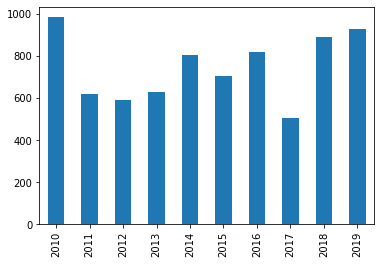

In [58]:
all_stat_year.plot(kind='bar')

**Теперь посмотрим как распределилось количество фильмов, которые выходили в показ в российских кинотеатрах, по годам**

In [59]:
rus_stat_year = data[data['box_office'].notna()]['year'].value_counts().sort_index()
rus_stat_year

2010    105
2011    109
2012    128
2013    184
2014    279
2015    465
2016    526
2017    357
2018    475
2019    530
Name: year, dtype: int64

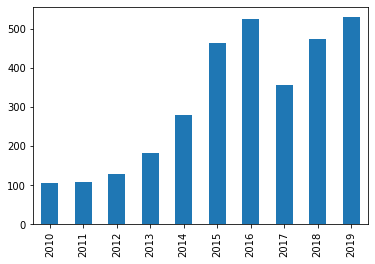

In [60]:
rus_stat_year.plot(kind='bar')

**Посчитаем долю фильмов вышедших в прокат в России**

In [61]:
'{:.2%}'.format(len(data[data['box_office'].notna()]) / len(data))

'42.19%'

**Посчитаем долю фильмов выходивших в прокат в России по годам**

In [62]:
rus_stat_year/all_stat_year

2010   0.11
2011   0.18
2012   0.22
2013   0.29
2014   0.35
2015   0.66
2016   0.64
2017   0.71
2018   0.53
2019   0.57
Name: year, dtype: float64

**С 2010 по 2014 в российский прокат выходила очень малая доля фильмов, со временем значение увеличивалось. Общая доля фильмов вышедших в прокат составила 42.19%. По гистограмме количества вышедших в прокат фильмов в России видно пораболический рост с 2010 по 2016, затем небольшой спад в 2017, за которым последовал рост.**

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

In [63]:
data.groupby('year')['box_office'].sum().astype('int')

year
2010        2428654
2011       14102765
2012        6955423
2013       29799708
2014     7444951857
2015    39497365190
2016    47866299757
2017    48563707218
2018    49668403134
2019    48425708783
Name: box_office, dtype: int64

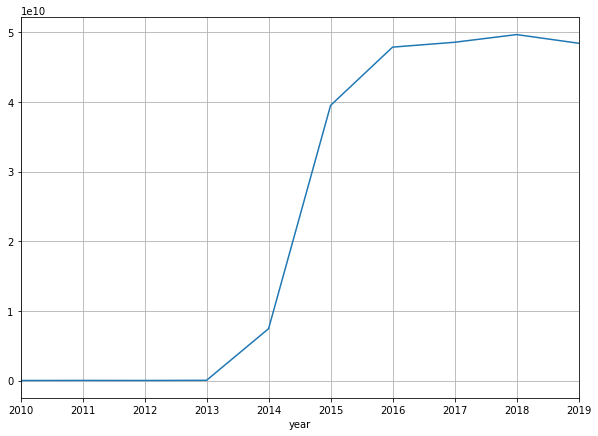

In [64]:
data.groupby('year')['box_office'].sum().plot(figsize=(10,7), grid=True)

**С 2013 по 2016 виден многократный рост сборов**

In [65]:
print(f'Минимальная сумма сборов была в {data.groupby("year")["box_office"].sum().idxmin()} \
году и составила {min(data.groupby("year")["box_office"].sum())} рублей')

Минимальная сумма сборов была в 2010 году и составила 2428654.0 рублей


In [66]:
print(f'Максимальная сумма сборов была в {data.groupby("year")["box_office"].sum().idxmax()} \
году и составила {max(data.groupby("year")["box_office"].sum())} рублей')

Максимальная сумма сборов была в 2018 году и составила 49668403134.0 рублей


- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [67]:
data.pivot_table(index='year', values='box_office', aggfunc=('mean', 'median'))

,mean,median
year,,
2010,23130.04,1700.00
2011,129383.17,3000.00
2012,54339.24,5660.00
2013,161954.93,3522.50
2014,26684415.26,18160.00
2015,84940570.30,4920933.00
2016,91000569.88,3846679.50
2017,136032793.33,9968340.00
2018,104565059.23,8891102.00


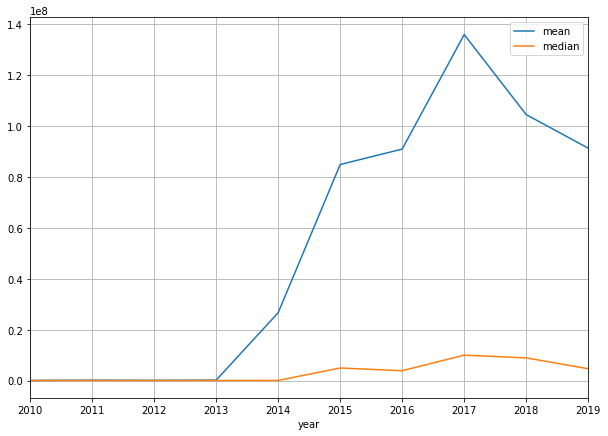

In [68]:
data.pivot_table(index='year', values='box_office', aggfunc=('mean', 'median')).plot(figsize=(10,7), grid=True)

**Средняя сумма сборов по годам резко увеличивалась с 2013 по 2015, максимальное среднее значение было в 2017 году и составило 136032793.33. Динасмика медианного значения показывает похожий рост, но без резкого увеличение в 2017, хотя имеет максимальное значение в 2017 году.**

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

**Посчитаем сборы по каждой категории в каждом году**

In [69]:
pivot_age_year = data.query('year >= 2015').pivot_table(index='year', 
                                       columns='age_restriction',
                                       values='box_office',
                                       aggfunc='sum').astype('int')
pivot_age_year

age_restriction,«0+»,«12+»,«16+»,«18+»,«6+»
year,,,,,
2015,379054580,13616082007,11368120867,5432308365,8701799371
2016,150228851,12204446526,16664548544,6793929825,12053146011
2017,229598930,7851427661,18745042900,9651495581,12086142146
2018,32449002,14267291657,16503602350,8760085500,10104974625
2019,17746066,12680198778,12753418985,10121796306,12852548648


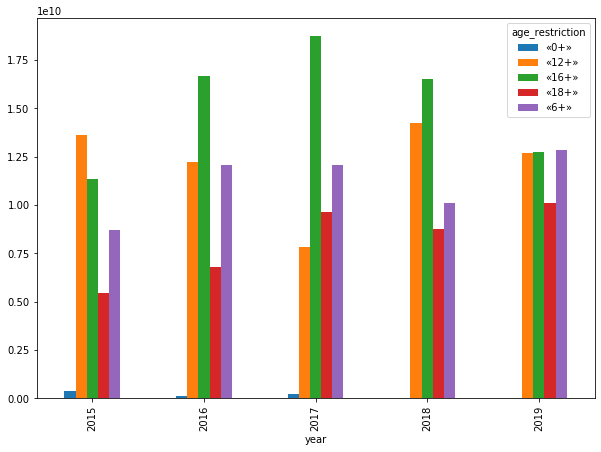

In [70]:
pivot_age_year.plot(kind='bar', figsize=(10,7), label='Количество фильмов по годам')

**По графику виден большой рост сборов в 2017 году у категорий 16+ и 18+ и спвд у 12+. Заметен сильный спад сборов у фильмов 0+. Проверим связанно ли это с количеством вышедших в данных категориях фильмов**

In [71]:
pivot_age_year_count = data.query('year >= 2015').pivot_table(index='year', 
                                                              columns='age_restriction',
                                                              values='box_office',
                                                              aggfunc='count').astype('int')
pivot_age_year_count

age_restriction,«0+»,«12+»,«16+»,«18+»,«6+»
year,,,,,
2015,39,73,168,132,53
2016,41,82,182,151,70
2017,3,41,121,147,45
2018,5,67,156,179,68
2019,3,85,178,183,81


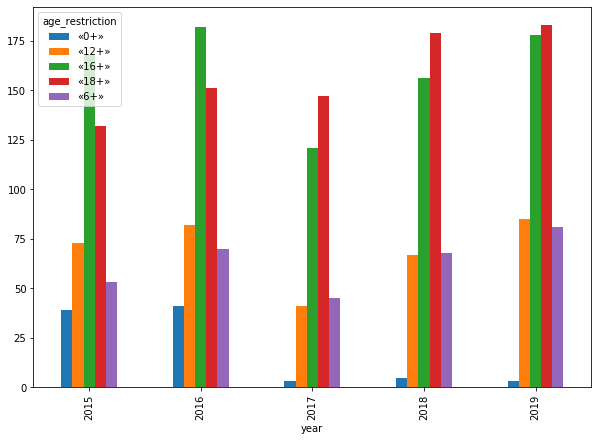

In [72]:
pivot_age_year_count.plot(kind='bar', figsize=(10,7), label='Количество фильмов по годам')

**По графику количества фильмов по категориям 16+, наблюдается обратная зависимость, 18+ тоже имеете небольшой спад. Количество фильмов в категориях, которые показывали максимальное количество сборов, в 2017 году меньше чем в других годах.**

age_restriction
«0+»       809077429
«12+»    60619446629
«16+»    76034733646
«18+»    40759615577
«6+»     55798610801
dtype: int64

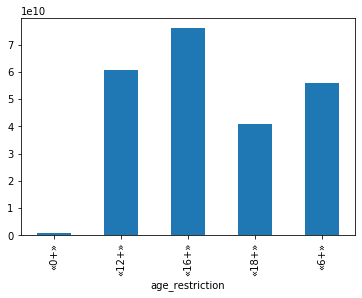

In [73]:
pivot_age_year.sum().plot(kind='bar')
pivot_age_year.sum()

#### Вывод
1. С 2010 по 2014 в российский прокат выходила очень малая доля фильмов, со временем значение увеличивалось. Общая доля фильмов вышедших в прокат составила 42.19%. По гистограмме количества вышедших в прокат фильмов в России видно пораболический рост с 2010 по 2016, затем небольшой спад в 2017, за которым последовал рост.
2. С 2013 по 2016 виден многократный рост сборов. Минимальная сумма сборов была в 2010 году и составила 2428654.0 рублей. Максимальная сумма сборов была в 2018 году и составила 49668403134.0 рублей
3. Средняя сумма сборов по годам резко увеличивалась с 2013 по 2015, максимальное среднее значение было в 2017 году и составило 136032793.33. Динасмика медианного значения показывает похожий рост, но без резкого увеличение в 2017, хотя имеет максимальное значение в 2017 году.
4. Наблюдался большой рост сборов в 2017 году у категорий 16+ и 18+, причем это не связано с увеличением количества вышедших в прокат фильмов в этом году. Возможно увеличение связано с более высокой посещаемостью.


### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [74]:
data_support = data[data['financing_source'] != 'нет'].copy()
data_support.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 1281 to 7478
Data columns (total 20 columns):
title                    332 non-null object
show_start_date          332 non-null datetime64[ns]
type                     332 non-null object
film_studio              332 non-null object
production_country       332 non-null object
director                 332 non-null object
producer                 330 non-null object
age_restriction          332 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  314 non-null float64
genres                   316 non-null object
pu_number                332 non-null int64
box_office               318 non-null float64
year                     332 non-null int64
genre_main               316 non-null object
director_main            332 non-null object
support_share            

In [75]:
columns_1 = ['refundable_support', 'nonrefundable_support', 'budget']
data_support = data_support.pipe(to_int, columns_1)

**Посчитаем как изменялось количество вышедших с поддержкой фильмов с годами**

2013     2
2014    16
2015    86
2016    61
2017    41
2018    56
2019    70
Name: year, dtype: int64

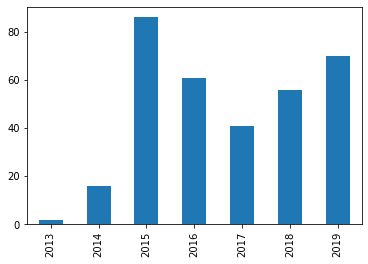

In [76]:
#data_support['year'].hist(bins=7)
data_support['year'].value_counts().sort_index().plot(kind='bar')
data_support['year'].value_counts().sort_index()

**Государственную поддержку начали выдавать с 2013 года, в 2015 годувышло больше всего фильмов, в 2017 виден спад.**

**Посчитаем какую сумму выделяют на поддержку и процент невозвратной суммы от нее** 

In [77]:
data_support['all_support'] = data_support['nonrefundable_support'] + data_support['refundable_support']
sum(data_support['all_support'])

20200688312

In [78]:
'{:.2%}'.format(sum(data_support['nonrefundable_support']) / (sum(data_support['all_support'])))

'80.50%'

**Процент невозвратной суммы от всей поддержки составляет 80.5%**

**Посмотрим как распределились значения в box_office**

count          318.00
mean     132432420.05
std      334837857.00
min           1550.00
25%        1236675.50
50%       15720067.50
75%      106373008.25
max     3073568691.00
Name: box_office, dtype: float64

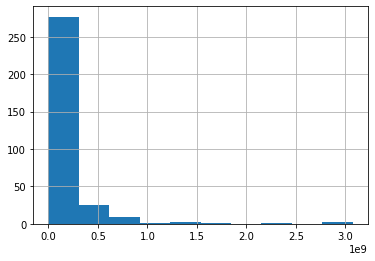

In [79]:
data_support['box_office'].hist()
data_support['box_office'].describe()

**Среднее значение сборов составляет 132432420.0, медианное в 10 раз меньше 15720067.50**

**Проверим как распредилилась доля государственной поддержки от бюджета**

count   332.00
mean      0.54
std       0.20
min       0.04
25%       0.38
50%       0.61
75%       0.66
max       1.00
Name: support_share, dtype: float64

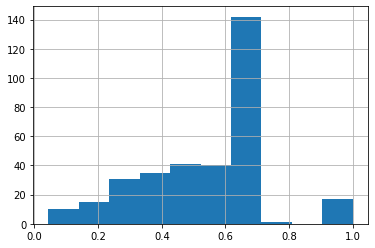

In [80]:
data_support['support_share'].hist()
data_support['support_share'].describe()

**Средняя доля поддержки от бюжета составляет 54%, медианная 61%**

«16+»   0.38
«12+»   0.32
«6+»    0.20
«18+»   0.08
«0+»    0.02
Name: age_restriction, dtype: float64

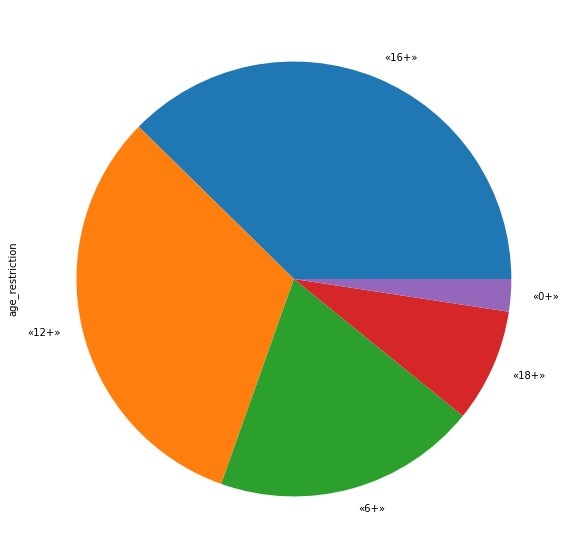

In [81]:
data_support['age_restriction'].value_counts().plot(kind='pie', figsize=(10,10))
data_support['age_restriction'].value_counts(normalize=True)

**В основном с поддержкой выходят фильмы с ограничением 16+, 12+, 6+**

**Посмотрим как распредилилилось количество вышедших фильмов по жанрам**

драма         0.29
комедия       0.23
мультфильм    0.10
триллер       0.05
мелодрама     0.05
фэнтези       0.03
фантастика    0.03
ужасы         0.03
военный       0.03
семейный      0.02
приключения   0.02
боевик        0.02
детектив      0.02
мюзикл        0.01
детский       0.01
история       0.01
криминал      0.01
спорт         0.01
биография     0.01
реальное ТВ   0.00
Name: genre_main, dtype: float64

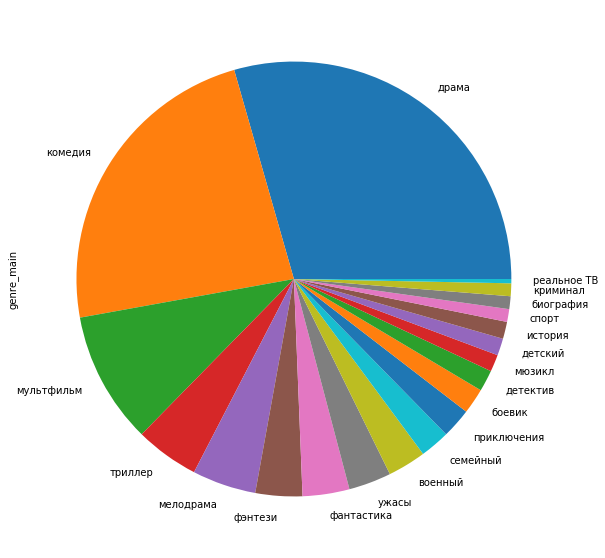

In [82]:
data_support['genre_main'].value_counts().plot(kind='pie', figsize=(10,10))
data_support['genre_main'].value_counts(normalize=True).sort_values(ascending=False)

**Больше всево фильмов с государственной поддержкой выходили в жанре драма, комедия, мультфильм, триллер и мелодрама. Посмотрим  на какие жанры выдали большего всего поддержки и сколько они собрали** 

genre_main
драма          5314406632
комедия        3218282945
мультфильм     2461520000
фантастика     1406000000
фэнтези        1032900000
история        1020000000
триллер         769645285
приключения     696000000
детектив        485000000
спорт           455000000
военный         422000866
мелодрама       398000000
ужасы           355000000
семейный        339000000
боевик          334000000
криминал        280000000
мюзикл          240453119
детский         119000000
биография       112510000
реальное ТВ      53000000
Name: all_support, dtype: int64

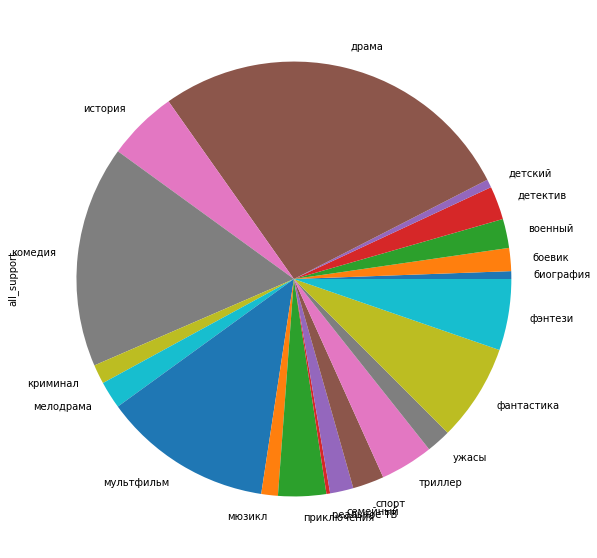

In [83]:
data_support.groupby('genre_main')['all_support'].sum().plot(kind='pie', figsize=(10,10))
data_support.groupby('genre_main')['all_support'].sum().sort_values(ascending=False)

**Больше всего поддержки выделили на фильмы в жанре драмма, комедия, мультфильмы, фантастика и фэнтези. Посчитаем сборы по жанрам**

genre_main
комедия       12479977452.00
драма          9490844103.00
мультфильм     5622014135.00
спорт          2967768387.00
фантастика     1718204279.00
история        1455468236.00
приключения    1205596977.00
военный        1017670472.00
фэнтези         995836609.00
ужасы           710123190.00
триллер         700450190.00
боевик          595928934.00
семейный        584424750.00
биография       516883038.00
криминал        239793863.00
детектив        138547511.00
мюзикл          101705005.00
мелодрама        54788966.00
реальное ТВ      32721103.00
детский           3013652.00
Name: box_office, dtype: float64

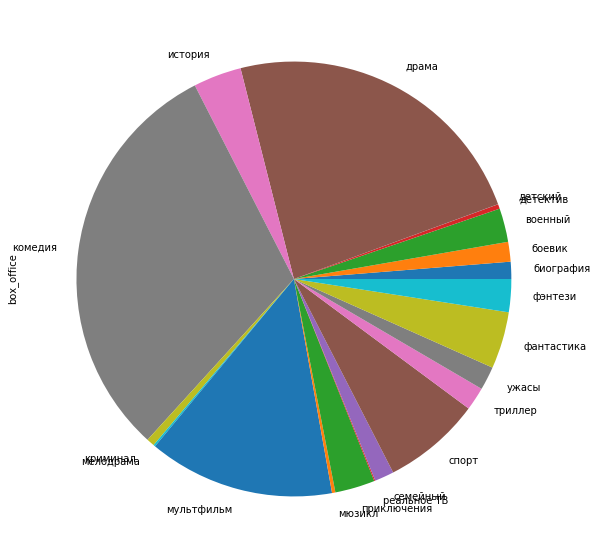

In [84]:
data_support.groupby('genre_main')['box_office'].sum().plot(kind='pie', figsize=(10,10))
data_support.groupby('genre_main')['box_office'].sum().sort_values(ascending=False)

**По сборам картина изменилась, на первом месте комедии затем драмма, мультфильм, спорт, фантастика.**

**Посчитаем отношение между выручкой и бюджетом на фильм**

In [85]:
data_support['margindlity'] = data_support['box_office'] / data_support['budget']

count   318.00
mean      0.83
std       1.69
min       0.00
25%       0.02
50%       0.18
75%       0.97
max      19.21
Name: margindlity, dtype: float64

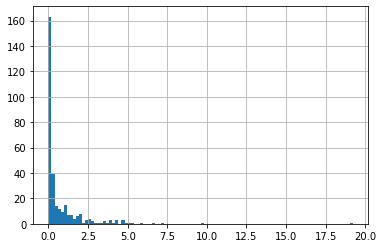

In [86]:
data_support['margindlity'].hist(bins=100)
data_support['margindlity'].describe()

In [87]:
'{:.2%}'.format(len(data_support[data_support['refundable_support'] <= data_support['box_office']]) / len(data_support))

'87.95%'

 **Возвратную государственную подержку окупили 87.95% фильмов, у остальных сбор меньше чем возвратная сумма**

In [88]:
'{:.2%}'.format(len(data_support[data_support['margindlity'] >= 1]) / len(data_support))

'23.80%'

**Всего 23.8% фильмов окупили бюджет, создадим отдельные датафреймы с успешными и неуспешными фильмами.**

In [89]:
good = data_support[data_support['margindlity'] >= 1].copy()
bad = data_support[data_support['margindlity'] < 1].copy()

комедия       0.40
драма         0.18
мультфильм    0.15
ужасы         0.04
семейный      0.04
военный       0.04
триллер       0.03
боевик        0.03
фантастика    0.03
спорт         0.03
приключения   0.01
история       0.01
биография     0.01
фэнтези       0.01
Name: genre_main, dtype: float64

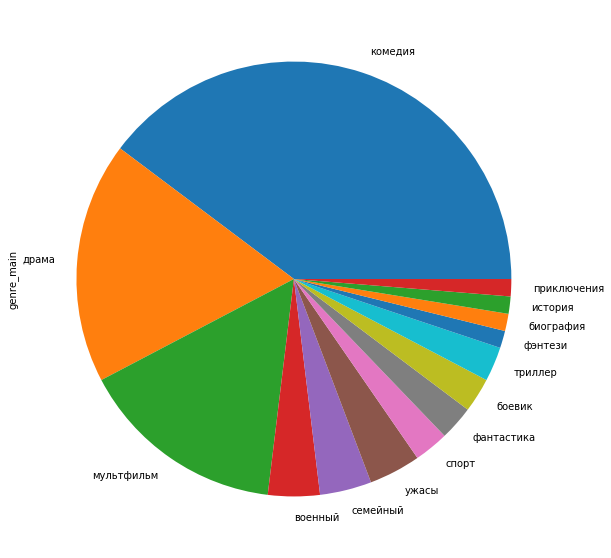

In [90]:
good['genre_main'].value_counts().plot(kind='pie', figsize=(10,10))
good['genre_main'].value_counts(normalize=True).sort_values(ascending=False)

драма         0.32
комедия       0.19
мультфильм    0.08
мелодрама     0.06
триллер       0.06
фэнтези       0.04
фантастика    0.04
ужасы         0.03
военный       0.03
детектив      0.02
приключения   0.02
боевик        0.02
мюзикл        0.02
криминал      0.01
история       0.01
детский       0.01
семейный      0.01
биография     0.01
реальное ТВ   0.00
спорт         0.00
Name: genre_main, dtype: float64

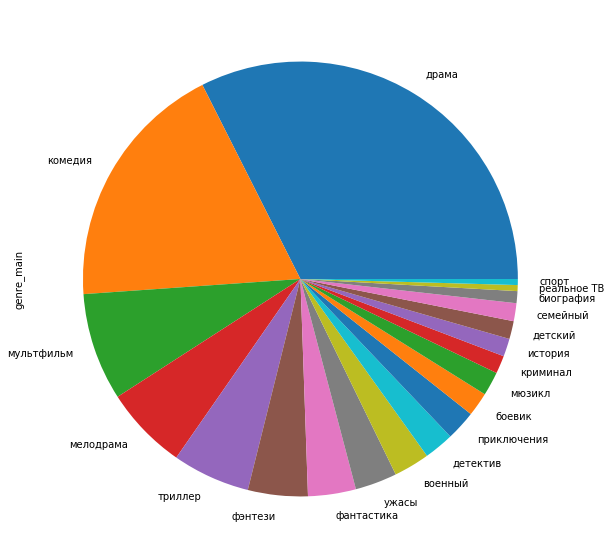

In [91]:
bad['genre_main'].value_counts().plot(kind='pie', figsize=(10,10))
bad['genre_main'].value_counts(normalize=True).sort_values(ascending=False)

**Самый популярный жанр среди окупаемых фильмов комедия, среди неокупаемых драмма**

**Проверим как распредилися рейтинг фильмов**

count   78.00
mean     6.06
std      1.08
min      2.90
25%      5.12
50%      6.20
75%      6.80
max      8.50
Name: ratings, dtype: float64

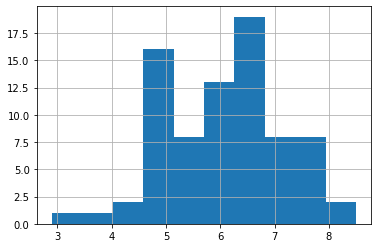

In [92]:
good['ratings'].hist()
good['ratings'].describe()

count   223.00
mean      5.98
std       1.15
min       1.00
25%       5.40
50%       6.20
75%       6.70
max       8.50
Name: ratings, dtype: float64

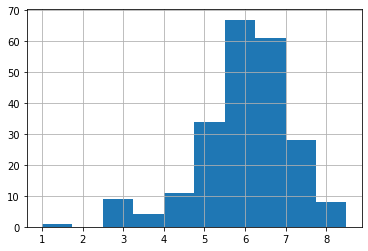

In [93]:
bad['ratings'].hist()
bad['ratings'].describe()

**Распределение фильмов по рейтингу в окупаемыех и неокупаемых примерно одинаковое.**

**Проверим как менялось количество фильмов в каждой группе по годам**

2014     3
2015    18
2016    12
2017    15
2018    20
2019    11
Name: year, dtype: int64

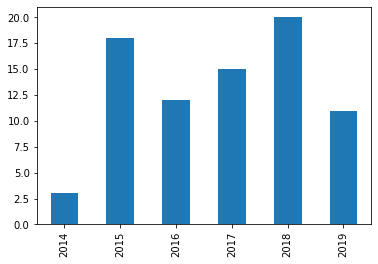

In [94]:
good['year'].value_counts().sort_index().plot(kind='bar')
good['year'].value_counts().sort_index()

2013     2
2014    13
2015    67
2016    48
2017    24
2018    36
2019    49
Name: year, dtype: int64

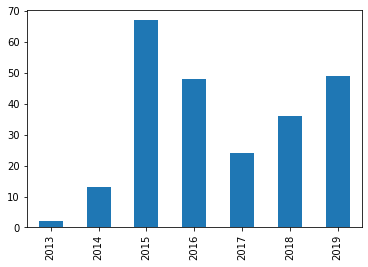

In [95]:
bad['year'].value_counts().sort_index().plot(kind='bar')
bad['year'].value_counts().sort_index()

**Наибольшее количество окупаемых фильмов вышло в 2018, неокупаемых в 2015**

In [96]:
good['year'].value_counts().sort_index() / bad['year'].value_counts().sort_index()

2013    nan
2014   0.23
2015   0.27
2016   0.25
2017   0.62
2018   0.56
2019   0.22
Name: year, dtype: float64

**2017 год является самым успешным, в нем отношение окупаемых фильмов к неокупаемым самое высокое**

**Проверим какие возрастные ограничения входят в окупаемые и неокупаемые фильмы и какое их количество**

«12+»   0.38
«16+»   0.32
«6+»    0.27
«18+»   0.03
«0+»    0.01
Name: age_restriction, dtype: float64

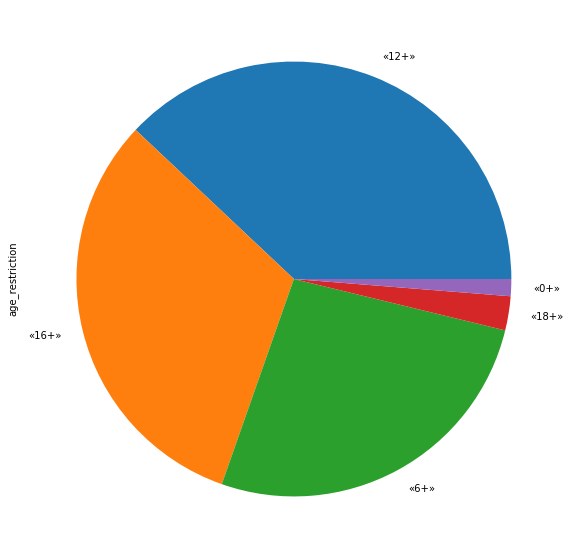

In [97]:
good['age_restriction'].value_counts().plot(kind='pie', figsize=(10,10))
good['age_restriction'].value_counts(normalize=True)

«16+»   0.40
«12+»   0.29
«6+»    0.18
«18+»   0.11
«0+»    0.02
Name: age_restriction, dtype: float64

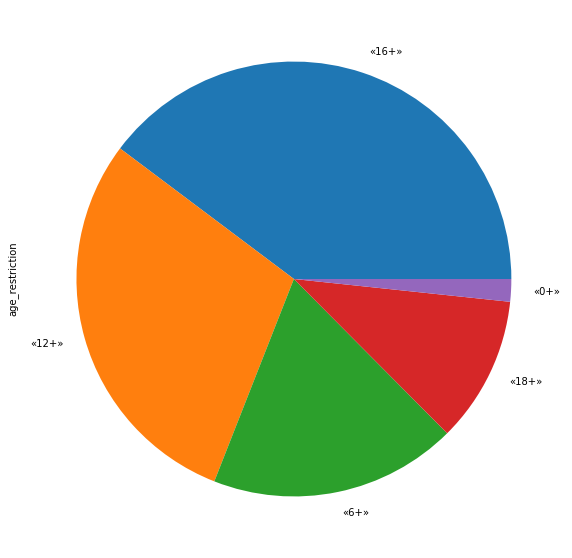

In [98]:
bad['age_restriction'].value_counts().plot(kind='pie', figsize=(10,10))
bad['age_restriction'].value_counts(normalize=True)

**Распределение по жанрам в примерно одинаковое, в неокупаемых больший процент с ограничением 18+**

#### Вывод
1. Государственную поддержку начали выдавать с 2013 года, в 2015 годувышло больше всего фильмов, в 2017 виден спад.
2. Сумма государственной поддержки за весе время составила 20200688312. Процент невозвратной суммы от всей поддержки составляет 80.5%.
3. Среднее значение сборов составляет 132432420.0, медианное в 10 раз меньше 15720067.50
4. Средняя доля поддержки от бюжета составляет 54%, медианная 61%
5. В основном с поддержкой выходят фильмы с ограничением 16+, 12+, 6+
6. Больше всево фильмов с государственной поддержкой выходили в жанре драма, комедия, мультфильм, триллер и мелодрама.
7. Больше всего поддержки выделили на фильмы в жанре драмма, комедия, мультфильмы, фантастика и фэнтези.
8. По сборам первом месте комедии затем драмма, мультфильм, спорт, фантастика.
9.  Возвратную государственную подержку окупили 87.95% фильмов, у остальных сбор меньше чем возвратная сумма.
10. Всего 23.8% фильмов окупили бюджет.
11. Самый популярный жанр среди окупаемых фильмов комедия, среди неокупаемых драмма
12. Распределение по рейтингу в окупаемых и неокупаемых фильмов примерно одинаковое.
13. Наибольшее количество окупаемых фильмов вышло в 2018, неокупаемых в 2015
14. Распределение по жанрам окупаемых и неокупаемых фильмов примерно одинаковое, в неокупаемых больший процент с ограничением 18+

### Шаг 5. Напишите общий вывод
1. С 2010 по 2014 в российский прокат выходила очень малая доля фильмов, со временем значение увеличивалось. Общая доля фильмов вышедших в прокат составила 42.19%. По гистограмме количества вышедших в прокат фильмов в России видно пораболический рост с 2010 по 2016, затем небольшой спад в 2017, за которым последовал рост.
2. С 2013 по 2016 виден многократный рост сборов. Минимальная сумма сборов была в 2010 году и составила 2428654.0 рублей. Максимальная сумма сборов была в 2018 году и составила 49668403134.0 рублей
3. Средняя сумма сборов по годам резко увеличивалась с 2013 по 2015, максимальное среднее значение было в 2017 году и составило 136032793.33. Динасмика медианного значения показывает похожий рост, но без резкого увеличение в 2017, хотя имеет максимальное значение в 2017 году.
4. Наблюдался большой рост сборов в 2017 году у категорий 16+ и 18+, причем это не связано с увеличением количества вышедших в прокат фильмов в этом году. Возможно увеличение связано с более высокой посещаемостью.
5. Большинство фильмов с государственной поддержкой выходили в жанре драма, комедия, мультфильм, триллер и мелодрама. Комедии имели больший успех и приносили больше сборов.
6. Возвратную государственную подержку окупили 87.95% фильмов, у остальных сбор меньше чем возвратная сумма
7. 23.8% фильмов смогли собрать сумму равную или больше бюджета, самый популярный жанр этих фильмов комедии. Драма менее интересна российским зрителям и является основным жанром в неокупаемых фильмах.
8. 2017 год является самым успешным, в нем отношение окупаемых фильмов к неокупаемым самое высокое и составляет 0.62